## IDEA


1) Analyze one feature at the time to see if it can be used to discriminate one or more classes from the rest
2) Analyze the feature vector as a whole – see if there is any correlation between the vector elements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

data = pd.read_csv('data/GenreClassData_30s.txt', sep='\t')

# Split the data into training and testing sets
train = data[data['Type'] == 'Train']
test = data[data['Type'] == 'Test']

# Define the features and targets
features = ['spectral_rolloff_mean', 'mfcc_1_mean', 'spectral_centroid_mean', 'tempo']

targets = ['Genre']

# feature data..
X_train = train[features]
# genre data
y_train = train[targets]

X_test, y_test = test[features], test[targets]

In [2]:

features_to_check = ['spectral_rolloff_mean', 'spectral_centroid_mean', 'tempo']
max_values = train[features_to_check].max()
min_values = train[features_to_check].min()

# Display the results
print("Max values:")
print(max_values)
print("\nMin values:")
print(min_values)

Max values:
spectral_rolloff_mean     8525.248449
spectral_centroid_mean    4283.044763
tempo                      184.570312
dtype: float64

Min values:
spectral_rolloff_mean     749.528801
spectral_centroid_mean    570.150688
tempo                      69.837416
dtype: float64


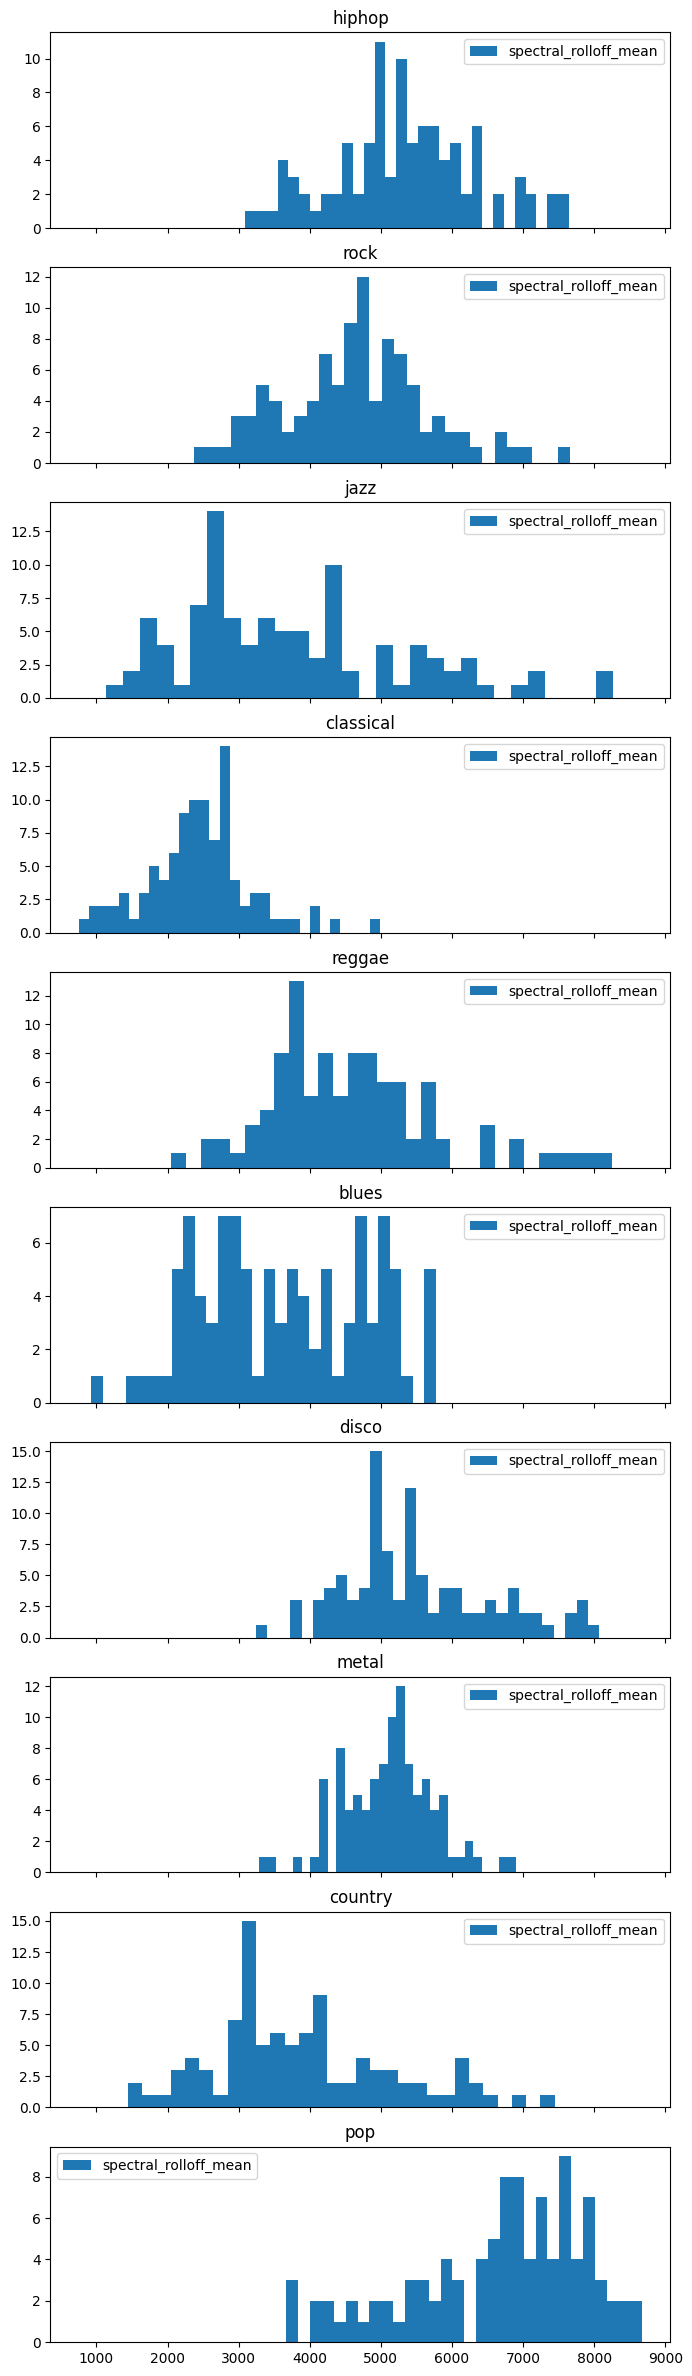

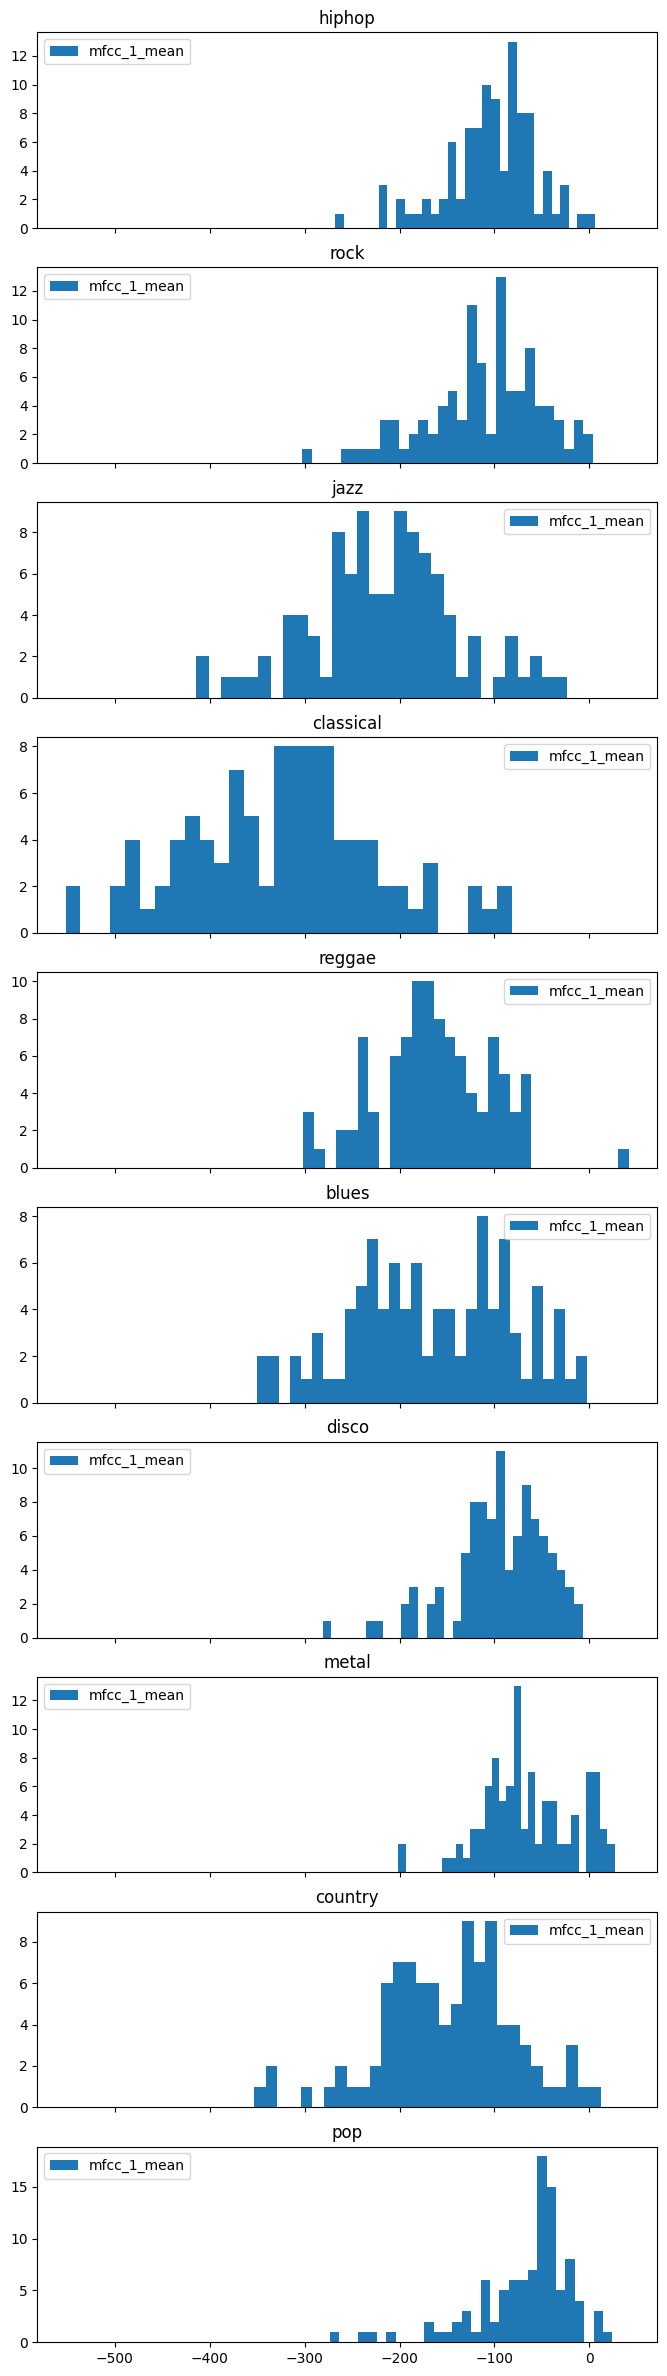

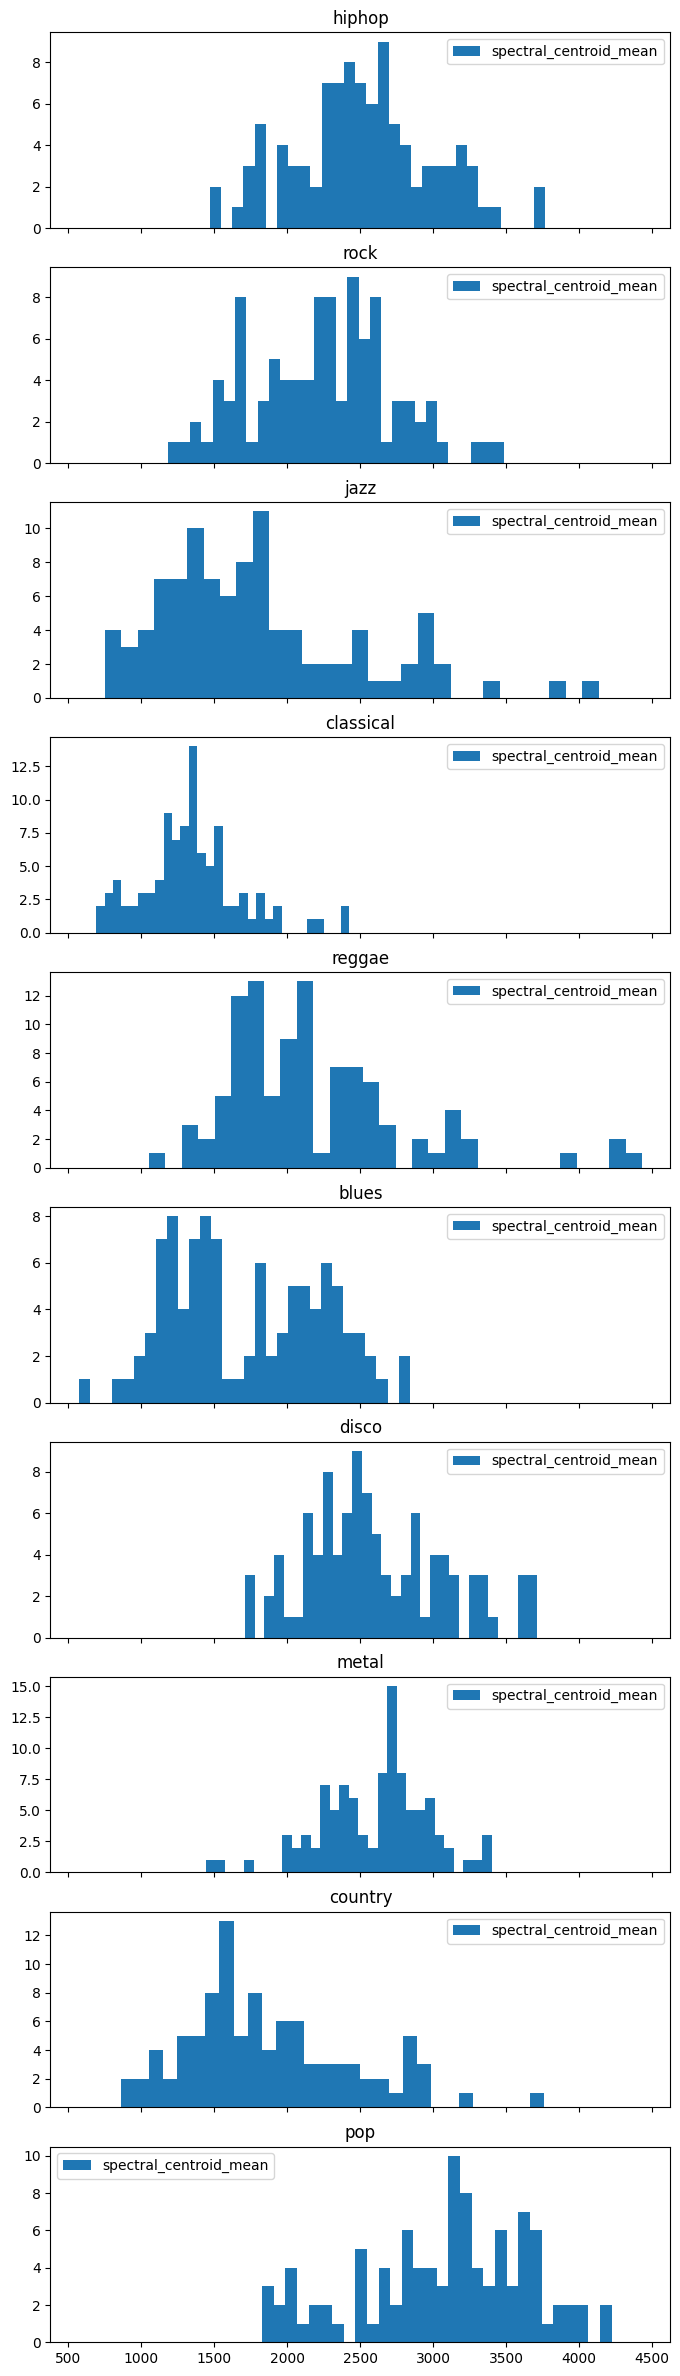

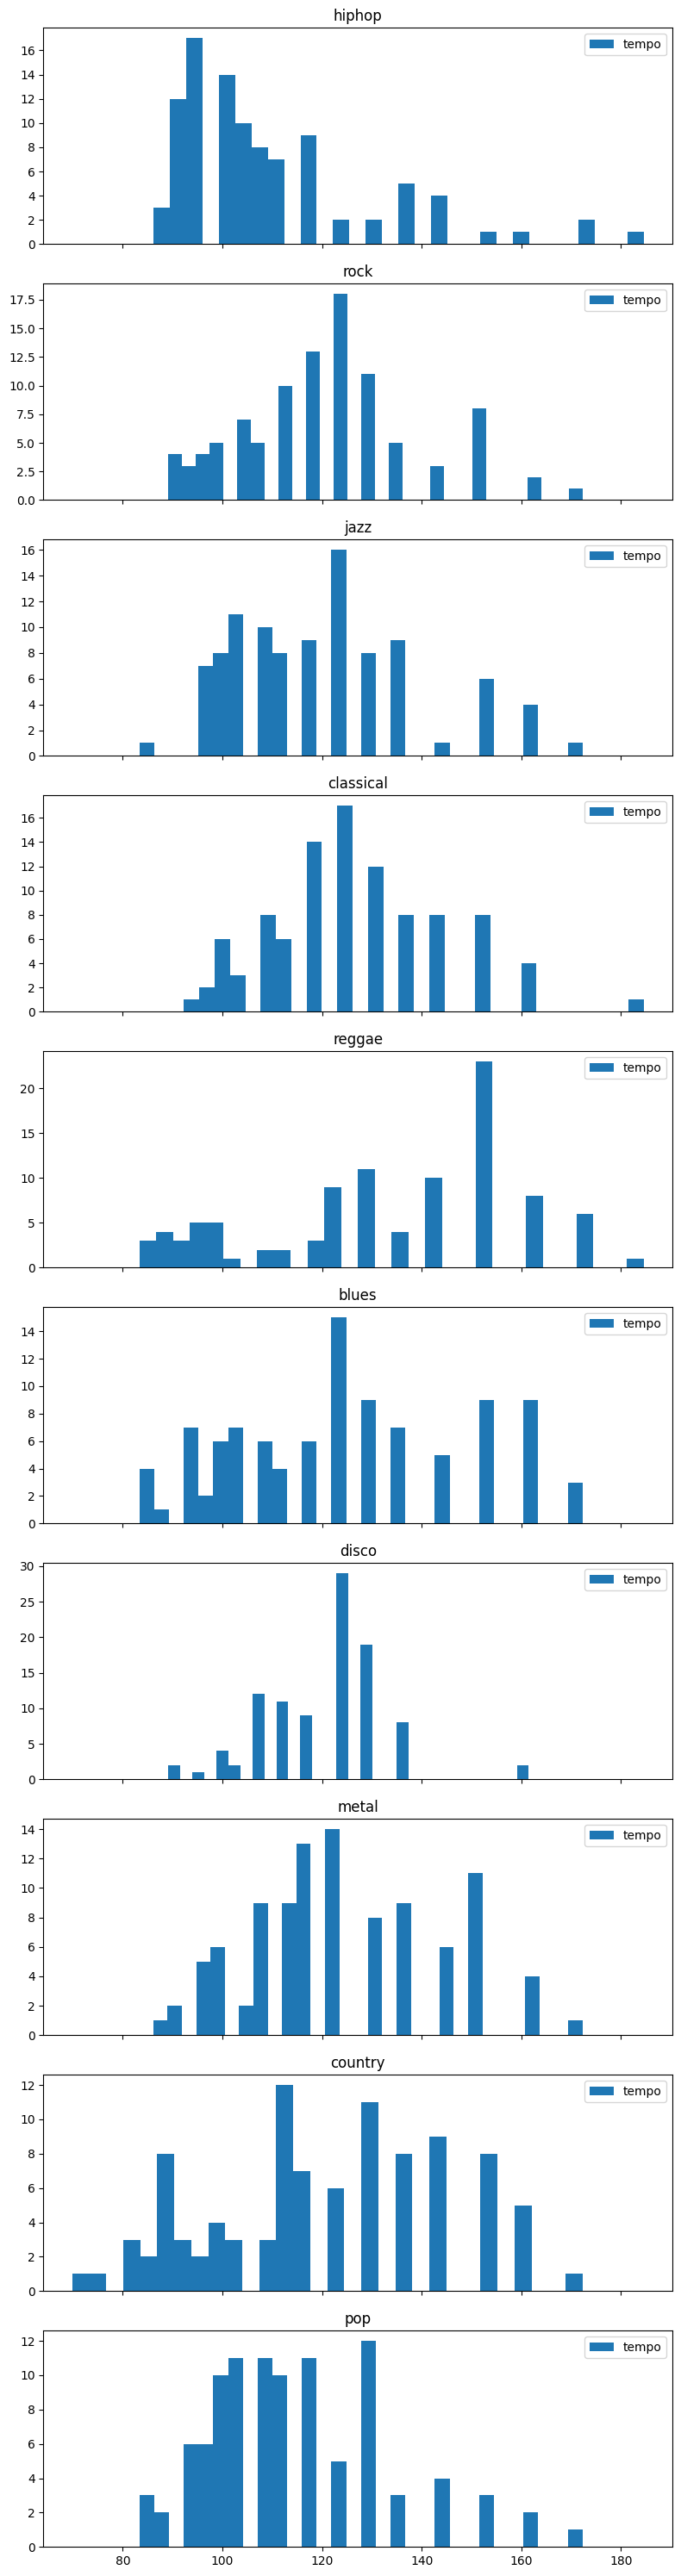

In [ ]:
plt.close('all') #Clear any existing figures

data_dict = {
    'hiphop': data[data['Genre'] == 'hiphop'],
    'rock': data[data['Genre'] == 'rock'],
    'jazz': data[data['Genre'] == 'jazz'],
    'classical': data[data['Genre'] == 'classical'],
    'reggae': data[data['Genre'] == 'reggae'],
    'blues': data[data['Genre'] == 'blues'],
    'disco': data[data['Genre'] == 'disco'],
    'metal': data[data['Genre'] == 'metal'],
    'country': data[data['Genre'] == 'country'],
    'pop': data[data['Genre'] == 'pop']
}


data_dict_prev = {
   
    'classical': data[data['Genre'] == 'classical'],
    'disco': data[data['Genre'] == 'disco'],
    'metal': data[data['Genre'] == 'metal'],
    'pop': data[data['Genre'] == 'pop']
}

# for key, value in dict.items():
for feature in features:
    fig, axes = plt.subplots(len(data_dict),1, figsize=(8,len(data_dict)*3), sharex=True )
    for ax, (genre, data)  in zip(axes, data_dict.items()):
        ax.hist(data[feature], bins=30, label=feature)
        ax.legend()
        ax.title.set_text(genre)

plt.tight_layout()
plt.show()